In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [125]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../Photos',
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names

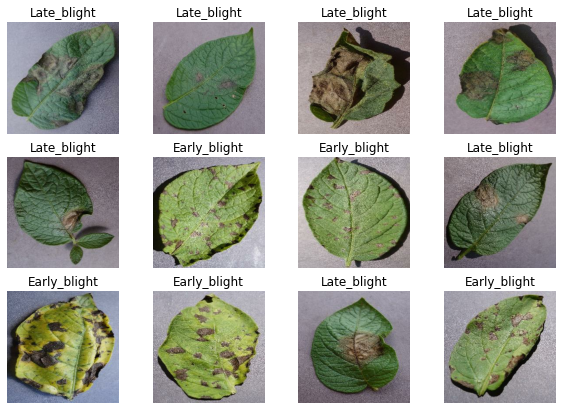

In [29]:
plt.figure(figsize=(10, 7))
for img_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [85]:
def train_test_val_split(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(len(ds)*train_split)
    val_size = int(len(ds)*val_split)

    train_set = ds.take(train_size)
    test_set = ds.skip(train_size).skip(val_size)
    val_set = ds.skip(train_size).take(val_size)
    
    return train_set, test_set, val_set

In [86]:
train_set, test_set, val_set = train_test_val_split(dataset)

In [90]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [103]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(*IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [104]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [120]:
input_shape = (BATCH_SIZE, *IMG_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),
])

In [121]:
model.build(input_shape)

In [ ]:
model.summary()

In [123]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
training_history = model.fit(
    train_set,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_set,
)

Epoch 1/50
54/54 [==============================] - 185s 3s/step - loss: 0.8635 - accuracy: 0.5191 - val_loss: 0.7057 - val_accuracy: 0.6510
Epoch 2/50
54/54 [==============================] - 174s 3s/step - loss: 0.6537 - accuracy: 0.7176 - val_loss: 0.5849 - val_accuracy: 0.7135
Epoch 3/50
54/54 [==============================] - 191s 3s/step - loss: 0.4632 - accuracy: 0.8003 - val_loss: 0.3716 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - ETA: 0s - loss: 0.3723 - accuracy: 0.8513